# **"Machine Learning with ChatGPT: Image Classification Model": Image Classification with a Keras Convolutional Neural Network (CNN) Model Capstone Project**
### Brandon Fox


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

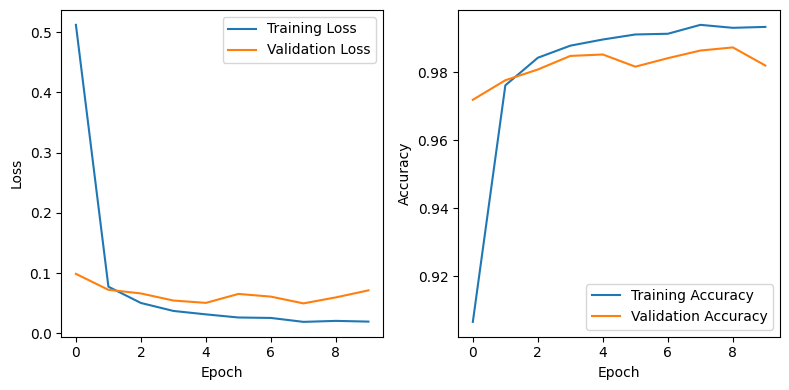

313/313 [==============================] - 5s 16ms/step - loss: 0.0597 - accuracy: 0.9843
Test Evaluation:
Loss: 0.05968025326728821
Accuracy: 0.9843000173568726


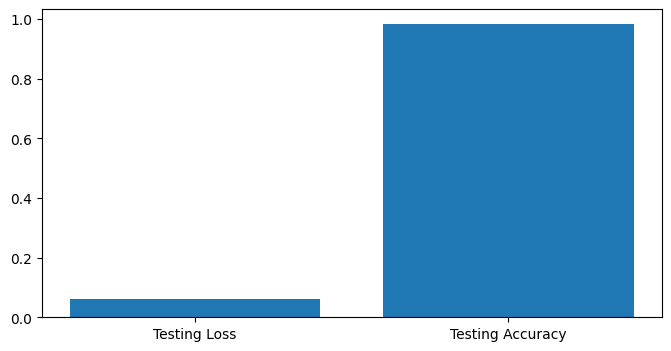

1/1 [==============================] - 0s 26ms/step


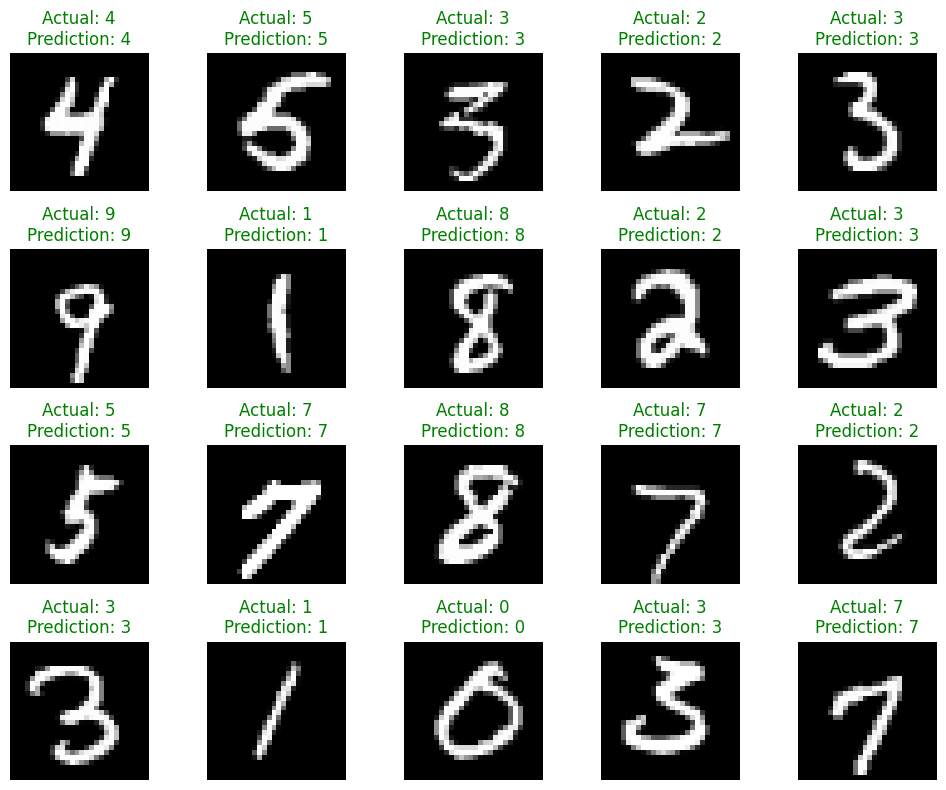

313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       1.00      0.97      0.98       892
           6       1.00      0.96      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.95      0.99      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

313/313 [==============================] - 4s 14ms/step


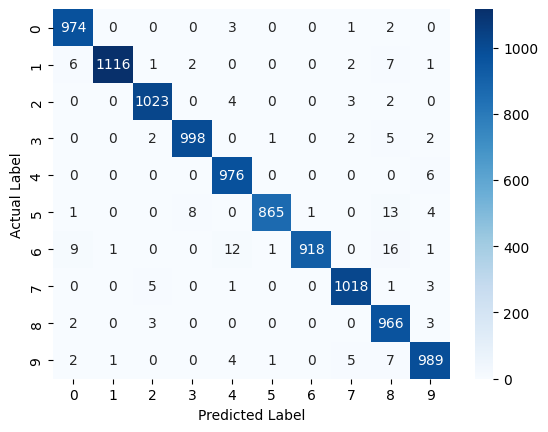

In [ ]:
# 0. Collect the raw data (it's the MNIST dataset)

# Importing the needed Machine Learning (ML) frameworks, libraries, APIs, packages, and modules (THIS IS NOT PART OF ANY STEP AT ALL!)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load in the raw data as training/testing data

# Loading in the raw data from the MNIST dataset into training/testing tuple data structures, respectively
# Training Tuple: (Image Training Samples, Training Labels), Testing Tuple: (Image Testing Samples, Testing Labels)
(x_sample_images_training, y_labels_training), (x_sample_images_testing, y_labels_testing) = keras.datasets.mnist.load_data()
# Recall: Tuples are "ordered", "immutable" Python data structures.
# Since we're loading the entire MNIST dataset into what has to be 2 tuple data structures, we'll always have the data loaded into "training" and "testing" tuples,
# rather than just leaving one of the tuples empty!

# 2. Preprocess the "training" data

# Reshaping the sample images to flat vectors
x_sample_images_training = x_sample_images_training.reshape((x_sample_images_training.shape[0], 28, 28, 1))
# "x_sample_images_testing.shape[0]" refers to the total number of sample images in the MNIST dataset and "28 * 28" (or 28 ** 2) refers to the input shape, or
# simply put, the dimensions of the input data.

# Converting the labels to one-hot encoded vectors
y_labels_training = to_categorical(y_labels_training, 10)
# "10" refers to the total number of label features there are, in which those labels are the numbers: 0 to 9.

# Spliting the dataset into "training" and "validation" subsets, respectively, with the "train_test_split" function from the "model_selection" module within the "scikit-learn" library
x_sample_images_training, x_validation, y_labels_training, y_validation = train_test_split(x_sample_images_training, y_labels_training, test_size=0.2, random_state=42)

# 3. Build and compile the neural network model

# Building the neural network model
model = Sequential()

# Adding in the convolutional layers to neural network model (this is how the model becomes a CNN model!)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Adding in a layer that "flattens" the features into a 1D vector
model.add(Flatten())

# Adding in the fully connected "Dense" layers into the CNN model
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# We need a "Softmax" activation function in the final layer because we're dealing with a "multi-class" classfication problem; the "Softmax" activation function
# outputs an array of class probabilities.

# Getting a summary of the CNN model
model.summary()

# See the structure of the CNN model in the next cell.

# Compiling the model
# Optimizer: Adam, Loss Function: Categorical crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train (or fit) the model

# Training (or fitting) the model
# Epochs: 10, Batch size: 128
history = model.fit(x_sample_images_training, y_labels_training, epochs=10, batch_size=128, verbose=1, validation_data=(x_validation, y_validation))

# 5. Plot the training and validation losses/accuracy results

plt.figure(figsize=(8, 4))

# Plotting the training and validation loss results
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy results
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Preprocess the "testing" data

# Reshaping the sample images to flat vectors
x_sample_images_testing = x_sample_images_testing.reshape((x_sample_images_testing.shape[0], 28, 28, 1))
# Converting the labels to one-hot encoded vectors
y_labels_testing = to_categorical(y_labels_testing, 10)

# 7. Test (or evaluate) the model

# Testing (or evaluating) the model
test_evaluation_loss, test_evaluation_accuracy = model.evaluate(x_sample_images_testing, y_labels_testing)
# Printing the loss and accuracy results of the test
print(f"Test Evaluation:\nLoss: {test_evaluation_loss}\nAccuracy: {test_evaluation_accuracy}")

# 8. Plot the testing loss and accuracy results

plt.figure(figsize=(8, 4))

# Plotting the testing loss and accuracy results on a bar graph
plt.bar(['Testing Loss', 'Testing Accuracy'], [test_evaluation_loss, test_evaluation_accuracy])
# It was noticed here that the testing loss/accuracy line plots didn't match nicely with the testing loss/accuracy results, at all. In order to fix this problem,
# a bar plot was used, in place of the line plot.

plt.show()

# 9. Have the model make further predictions on more unobserved image data

fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()

# Generating 20 color-coded predictions on 20 unobserved pieces of image data
for i in range(20):

    # Getting a random index value
    index = np.random.randint(0, len(x_sample_images_training))

    # Preprocessing a random sample image from the training dataset, based on the random index
    image = x_sample_images_training[index].reshape(28, 28)

    # Getting the "actual" label value from the randomly selected sample image, based on the random index
    actual = np.argmax(y_labels_training[index])

    # Having our model get the "predicted" label value from the randomly selected sample image, based on the random index
    prediction = np.argmax(model.predict(x_sample_images_training[index].reshape(1, *(28, 28, 1))))
    # The "np.argmax" function returns the index value of the maximum probability in an array of probabilities; that is, in this case, we'll end up getting such a "0 to 9" value,
    # which is a desired, "predicted" label value, depending on where the maximum probability occurs in the array.

    if(prediction == actual):
        color = 'green'
    else:
        color = 'red'

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Actual: {actual}\nPrediction: {prediction}", color=color)
    axes[i].axis('off')

# 10. Plot the model's predicted and actual values

# Plotting the model's "predicted" and "actual" label values
plt.tight_layout()
plt.show()

# 11. Print a classification report and/or plot a Seaborn heatmap

# Classification Report

# Getting the predicted labels from the model's output probabilities
y_predicted_label_value = np.argmax(model.predict(x_sample_images_testing), axis=-1)

# Converting multilabel-indicator labels to multiclass labels
if((len(y_labels_testing.shape) > 1) and (y_labels_testing.shape[1] > 1)):
    y_labels_testing = np.argmax(y_labels_testing, axis=-1)

# Creating a confusion matrix
cm = confusion_matrix(y_labels_testing, y_predicted_label_value)

# Printing the classification report
print(classification_report(y_labels_testing, y_predicted_label_value))

# Seaborn Heatmap

# Getting the predicted labels from the model's output probabilities
y_predicted_label_value = np.argmax(model.predict(x_sample_images_testing), axis=-1)

# Converting multilabel-indicator labels to multiclass labels
if((len(y_labels_testing.shape) > 1) and (y_labels_testing.shape[1] > 1)):
    y_labels_testing = np.argmax(y_labels_testing, axis=-1)

# Creating a confusion matrix
cm = confusion_matrix(y_labels_testing, y_predicted_label_value)

# Plotting the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

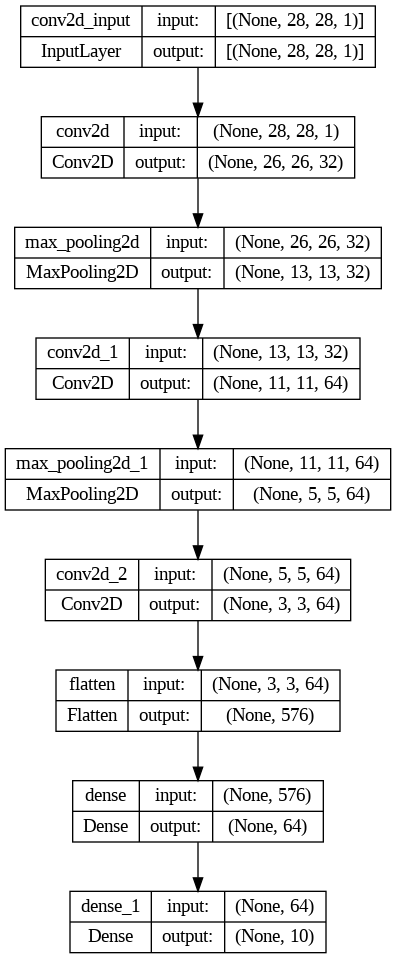

In [ ]:
# Plotting the "layer-by-layer" structure of the CNN model
plot_model(model, show_shapes=True, show_layer_names=True)
# We have to plot this on a seperate cell (not sure why, but that's just how it is!)